<a href="https://colab.research.google.com/github/salonijaitly/ML_Sem_V/blob/master/ML_04_J070_070720/ML_04_J070_070720.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2)  

#**Exercise: 1**

In [ ]:
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [ ]:
df_can.drop(['AREA', 'Coverage', 'Type', 'REG', 'DEV'],axis=1, inplace=True)

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-status'}, inplace=True)

In [ ]:
df_can.set_index('Country', inplace=True)

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

In [ ]:
years = range(1980,2014)

In [ ]:
df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


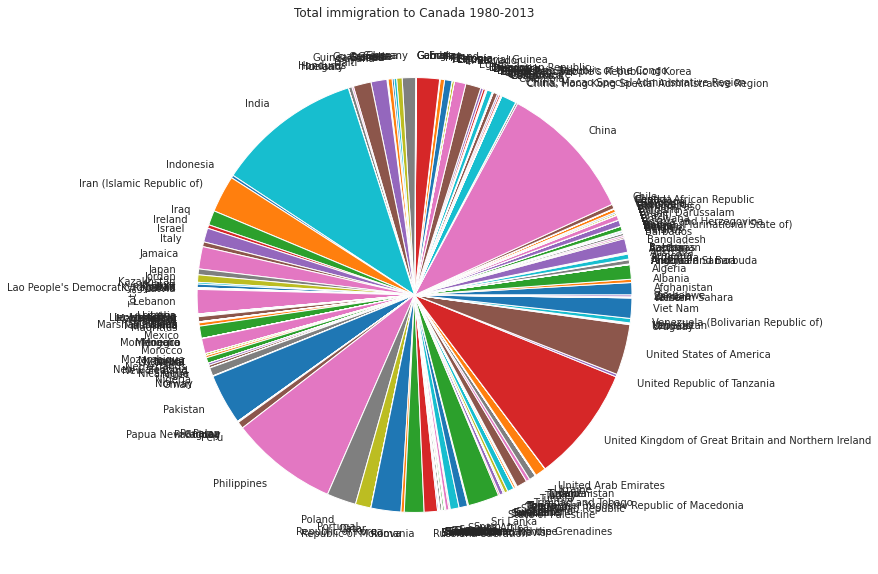

In [ ]:
df_can['Total'].plot(
    kind='pie',
    figsize=(10,10),
  )
plt.title("Total immigration to Canada 1980-2013")
plt.show()

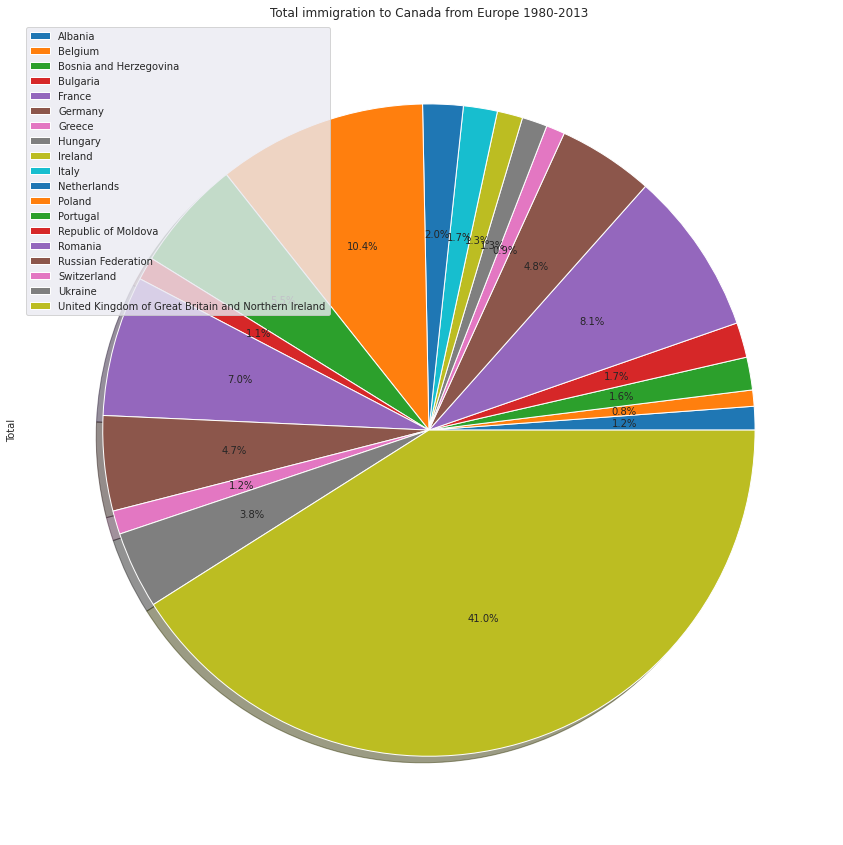

In [ ]:
dfnew2 = df_can[(df_can['Continent']=='Europe') & (df_can['Total']>10000)]

dfnew2['Total'].plot(
    kind='pie',
    figsize=(20,15),
    autopct='%1.1f%%',
    shadow=True,
    labels=None
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.legend(labels=dfnew2.index, loc="upper left")
plt.show()

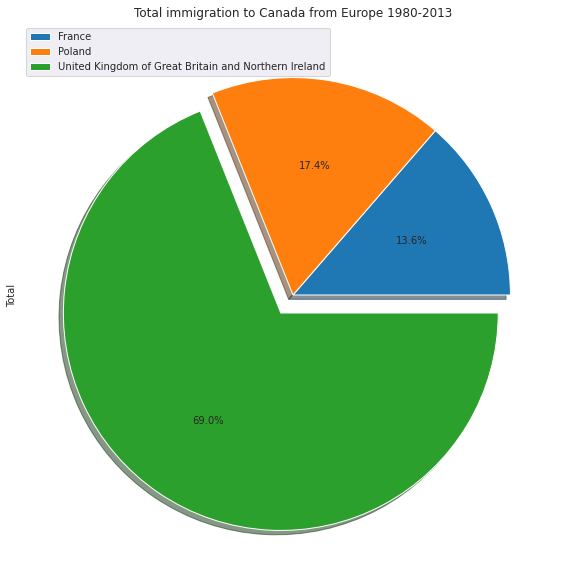

In [ ]:
dfnew3 = df_can[(df_can['Continent']=='Europe') & (df_can['Total']>100000)]

colors = ['yellow','blue','red']
explodes = [0,0,0.1]

dfnew3['Total'].plot(
    kind='pie',
    figsize=(10,10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    explode=explodes
  )
plt.title("Total immigration to Canada from Europe 1980-2013")
plt.legend(labels=dfnew3.index, loc="upper left")
plt.show()

**Q1. By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

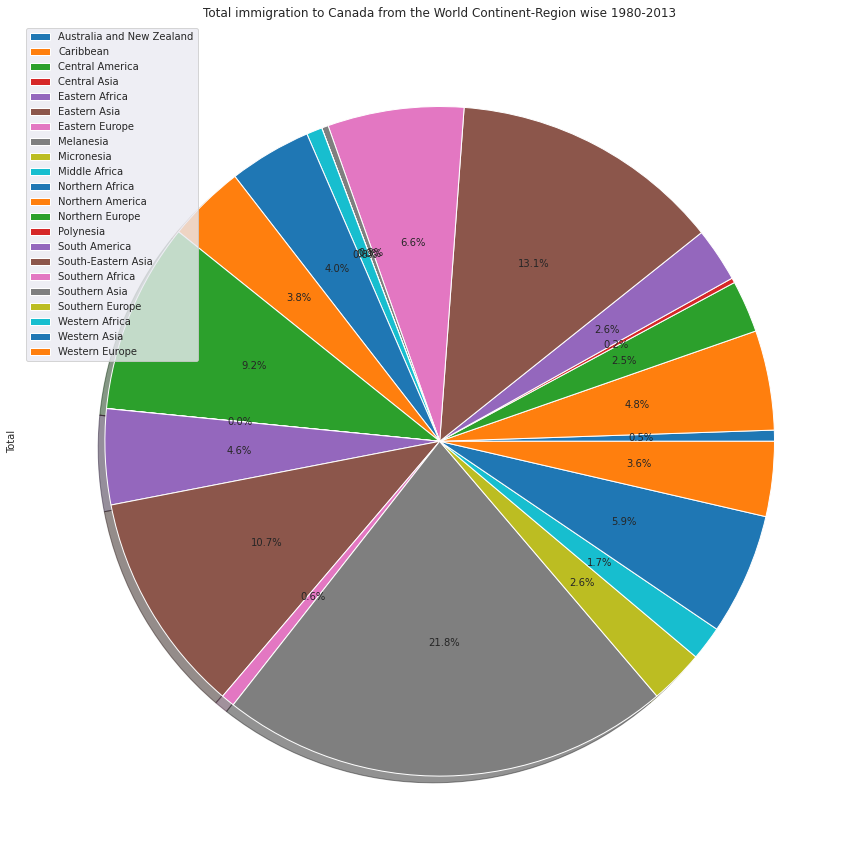

In [ ]:
dfnew4 = df_can.groupby('Continent-Region', axis='rows').sum()

dfnew4.head()
dfnew4['Total'].plot(
    kind='pie',
    figsize=(15, 20),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    startangle = 0,
  )
plt.title("Total immigration to Canada from the World Continent-Region wise 1980-2013")
plt.legend(labels=dfnew4.index, loc="upper left")
plt.show()

**Q2.By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

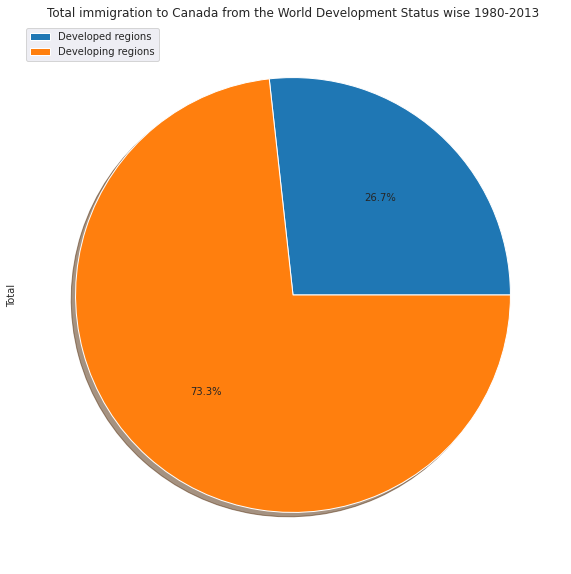

In [ ]:
dfnew4 = df_can.groupby('Development-status', axis='rows').sum()

dfnew4.head()
dfnew4['Total'].plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    startangle = 0,
  )
plt.title("Total immigration to Canada from the World Development Status wise 1980-2013")
plt.legend(labels=dfnew4.index, loc="upper left")
plt.show()

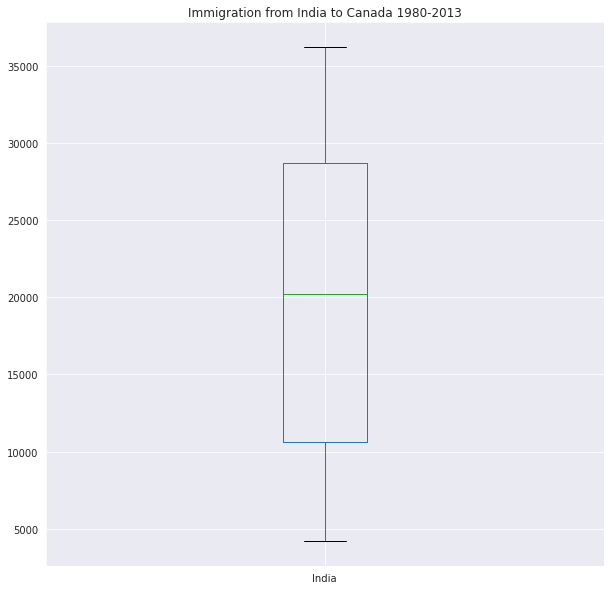

In [ ]:
df_can.head()

df_india = df_can.loc[['India'],years].transpose()
df_india.head()

df_india.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India to Canada 1980-2013")
plt.show()

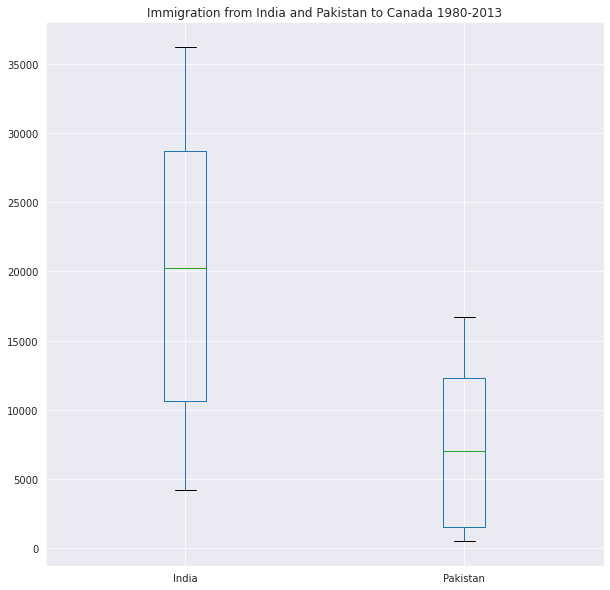

In [ ]:
df_indiapak = df_can.loc[['India','Pakistan'],years].transpose()
df_indiapak.head()

df_indiapak.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from India and Pakistan to Canada 1980-2013")
plt.show()

In [ ]:
df_can.sort_values(by='Total', ascending=False, inplace=True, axis='index')

dftop5 = df_can.head(5)

dftop5 = dftop5[years].transpose()

dfbottom5 = df_can.tail(5)

dfbottom5 = dfbottom5[years].transpose()


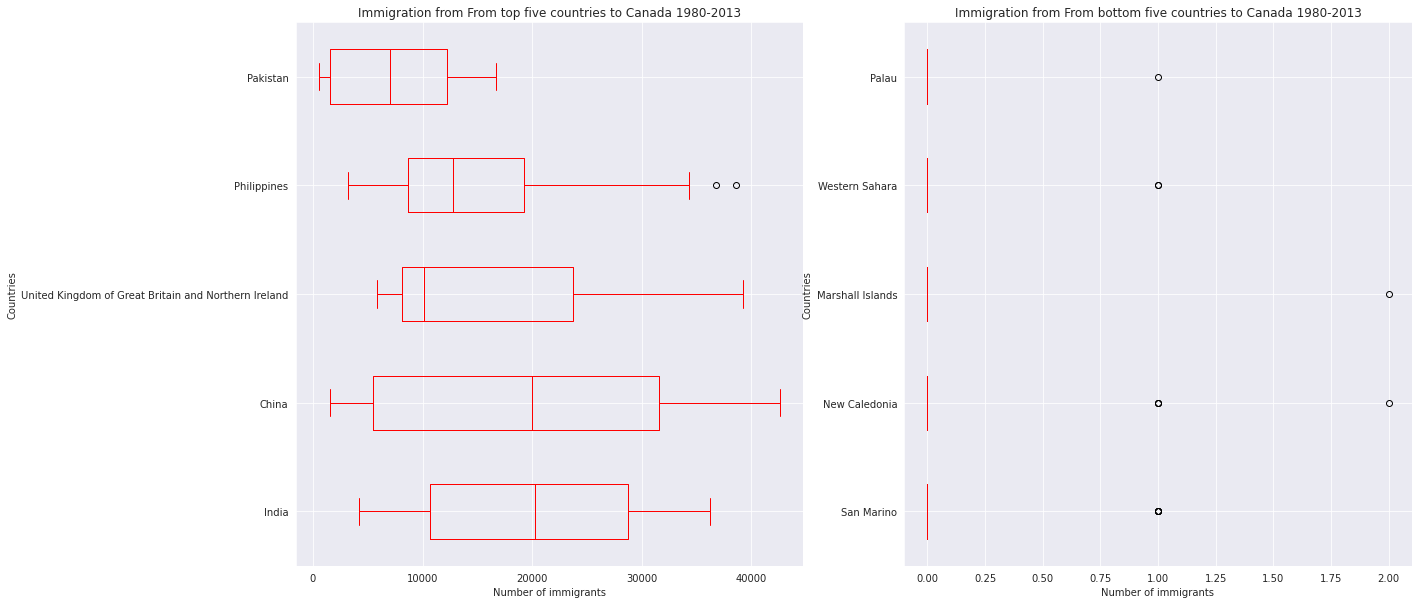

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


dftop5.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax0)
ax0.set_title("Immigration from From top five countries to Canada 1980-2013")
ax0.set_xlabel("Number of immigrants")
ax0.set_ylabel("Countries")

dfbottom5.plot(kind="box",figsize=(20,10),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from From bottom five countries to Canada 1980-2013")
ax1.set_xlabel("Number of immigrants")
ax1.set_ylabel("Countries")

plt.show()

**Q3. Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania**

In [ ]:
df_can.sort_values(by='Total', ascending=False, inplace=True, axis='index')

In [ ]:
asia = df_can[df_can['Continent']=='Asia'].head(5)
asia = asia[years].transpose()
europe = df_can[df_can['Continent']=='Europe'].head(5)
europe = europe[years].transpose()
africa = df_can[df_can['Continent']=='Africa'].head(5)
africa = africa[years].transpose()
oceania = df_can[df_can['Continent']=='Oceania'].head(5)
oceania = oceania[years].transpose()

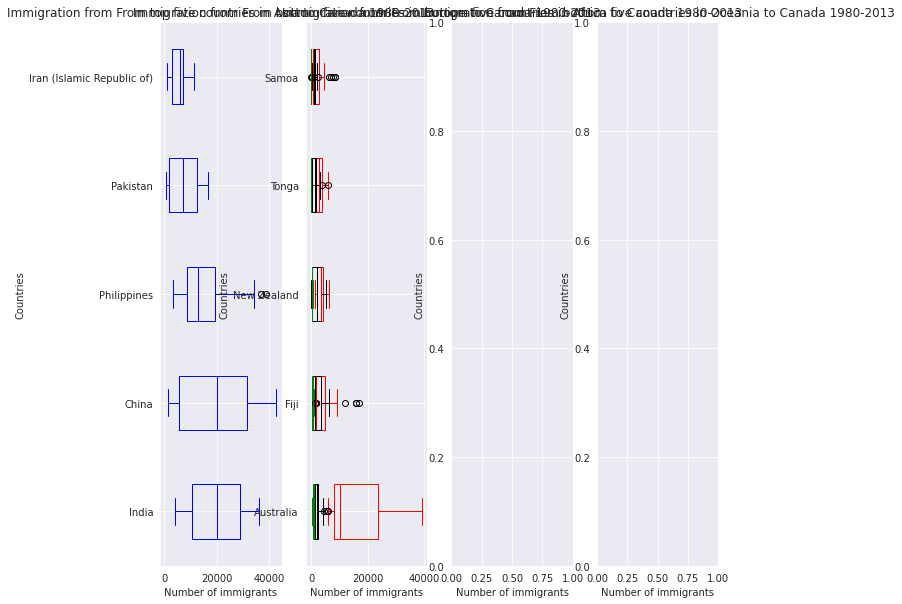

In [ ]:
fig = plt.figure()

ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,2)
ax2 = fig.add_subplot(1,4,3)
ax3 = fig.add_subplot(1,4,4)

asia.plot(kind="box",figsize=(10,10),vert=False,color='blue', ax=ax0)
ax0.set_title("Immigration from From top five countries in Asia to Canada 1980-2013")
ax0.set_xlabel("Number of immigrants")
ax0.set_ylabel("Countries")

europe.plot(kind="box",figsize=(10,10),vert=False,color='red', ax=ax1)
ax1.set_title("Immigration from From bottom five countries in Europe to Canada 1980-2013")
ax1.set_xlabel("Number of immigrants")
ax1.set_ylabel("Countries")

africa.plot(kind="box",figsize=(10,10),vert=False,color='black', ax=ax1)
ax2.set_title("Immigration from From bottom five countries in Africa to Canada 1980-2013")
ax2.set_xlabel("Number of immigrants")
ax2.set_ylabel("Countries")

oceania.plot(kind="box",figsize=(10,10),vert=False,color='green', ax=ax1)
ax3.set_title("Immigration from From bottom five countries in Oceania to Canada 1980-2013")
ax3.set_xlabel("Number of immigrants")
ax3.set_ylabel("Countries")

plt.show()

In [ ]:
dfindia = df_can.loc[['India'], years].transpose().describe()

Q1 = 10343.0
Q3= 28572.0
IQR=Q3-Q1
Outlier1 = Q3+1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

55915.5
-17000.5


In [ ]:
dfindia = df_can.loc[['India'], years]
dfindia = dfindia[2013].describe()
q1 = dfindia.loc['75%']
q1

33087.0

**Q4. Identify countries which are outliers based on total migration**

In [ ]:
for country in df_can.index:
  df = df_can.loc[[country], years].transpose().describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)
  print("----")

Country
India    55792.125
dtype: float64
Country
India   -16454.875
dtype: float64
----
Country
China    70652.125
dtype: float64
Country
China   -33570.875
dtype: float64
----
Country
United Kingdom of Great Britain and Northern Ireland    47095.375
dtype: float64
Country
United Kingdom of Great Britain and Northern Ireland   -15315.625
dtype: float64
----
Country
Philippines    35128.0
dtype: float64
Country
Philippines   -7216.0
dtype: float64
----
Country
Pakistan    28298.875
dtype: float64
Country
Pakistan   -14474.125
dtype: float64
----
Country
United States of America    12313.5
dtype: float64
Country
United States of America    1693.5
dtype: float64
----
Country
Iran (Islamic Republic of)    12745.0
dtype: float64
Country
Iran (Islamic Republic of)   -2751.0
dtype: float64
----
Country
Sri Lanka    9307.625
dtype: float64
Country
Sri Lanka   -1163.375
dtype: float64
----
Country
Republic of Korea    11054.25
dtype: float64
Country
Republic of Korea   -2787.75
dtype: float64


In [ ]:
years = range(1980,2014)
dfscat = pd.DataFrame(df_can[years].sum(axis='index'))

dfscat.reset_index(inplace=True)

dfscat.columns = ['Year', 'Total']

dfscat.head()

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


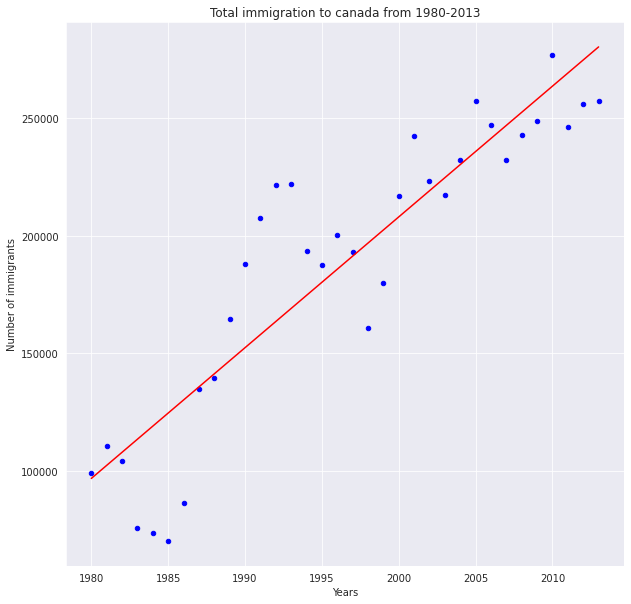

In [ ]:
import numpy as np
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='blue'
)
plt.title("Total immigration to canada from 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

plt.plot(x, fit[0]*x+fit[1], color='red')

plt.show()

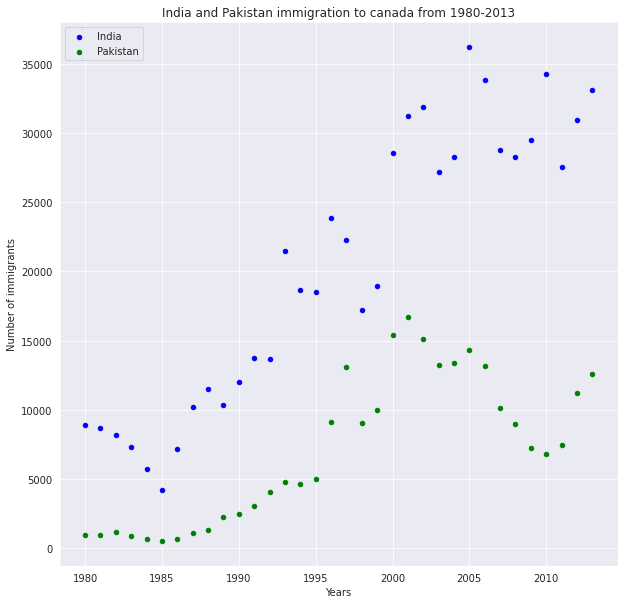

In [ ]:
dfindopak = df_can.loc[['India','Pakistan'], years].transpose()
dfindopak.reset_index(inplace=True)
dfindopak.index.name = 'index'
dfindopak.rename(columns={'index':'Year'}, inplace=True)

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue'
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

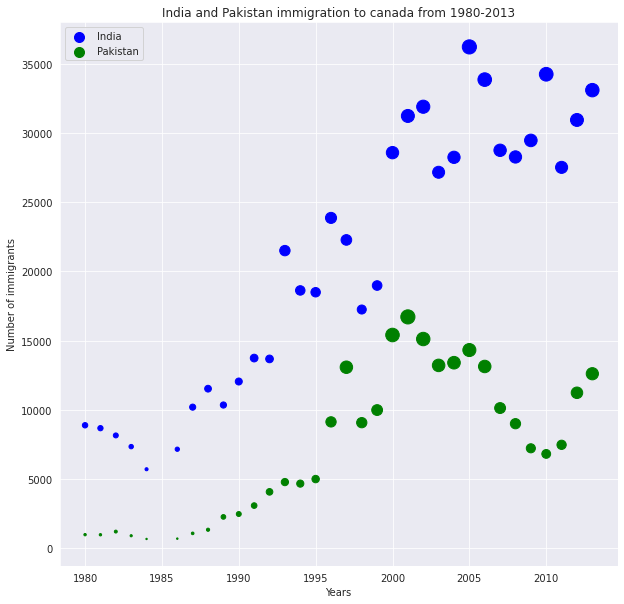

In [ ]:
normindia = (dfindopak['India'] - dfindopak['India'].min()) / (dfindopak['India'].max() - dfindopak['India'].min())
normpak = (dfindopak['Pakistan'] - dfindopak['Pakistan'].min()) / (dfindopak['Pakistan'].max() - dfindopak['Pakistan'].min())

ax0 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='India',
    color='blue',
    s = normindia*200
)

ax1 = dfindopak.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Pakistan',
    color='green',
    ax=ax0,
    s = normpak*200
)


ax0.set_title("India and Pakistan immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')

**Q5. Plot the bubble plot for Norway, Denmark, Finland**

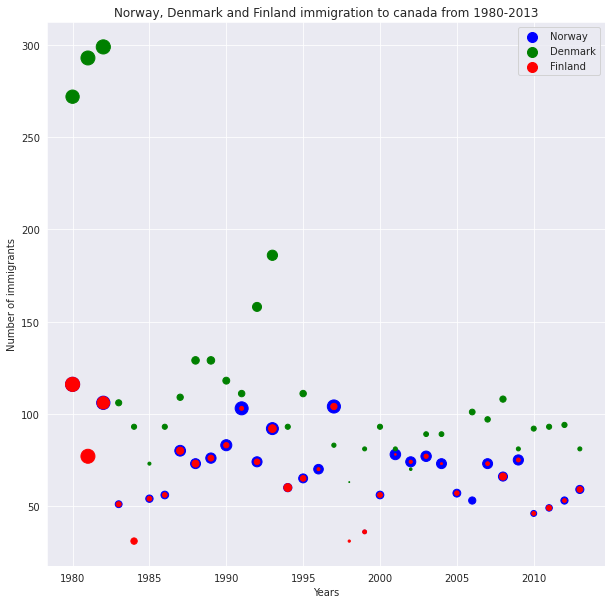

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Finland'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Finland'] - df['Finland'].min()) / (df['Finland'].max() - df['Finland'].min())


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
    s = normnor*200
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
    s = normden*200
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='red',
    ax=ax0,
    s = normfin*200
)


ax0.set_title("Norway, Denmark and Finland immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Finland'], loc='upper right')

#**Exercise 2:**
**Q1. Scatter plot for Norway, Denmark and sweden**

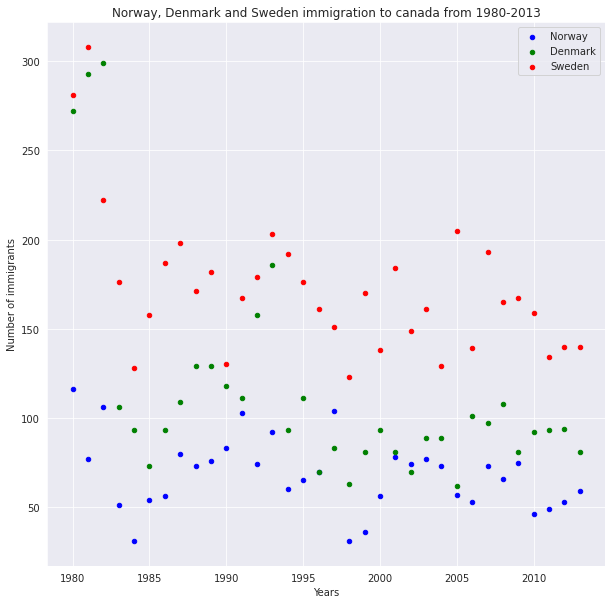

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Sweden'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue'
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Sweden',
    color='red',
    ax=ax0
)


ax0.set_title("Norway, Denmark and Sweden immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Sweden'], loc='upper right')

**Q2. Bubble plot for Norway, Denmark and Sweden**

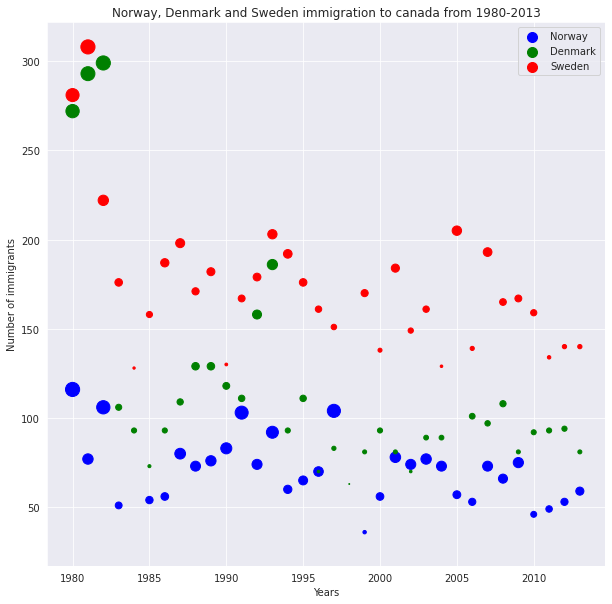

In [ ]:
df = df_can.loc[['Norway','Denmark', 'Sweden'], years].transpose()
df.reset_index(inplace=True)
df.index.name = 'index'
df.rename(columns={'index':'Year'}, inplace=True)

normnor = (df['Norway'] - df['Norway'].min()) / (df['Norway'].max() - df['Norway'].min())
normden = (df['Denmark'] - df['Denmark'].min()) / (df['Denmark'].max() - df['Denmark'].min())
normfin = (df['Sweden'] - df['Sweden'].min()) / (df['Sweden'].max() - df['Sweden'].min())


ax0 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Norway',
    color='blue',
    s = normnor*200
)

ax1 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Denmark',
    color='green',
    ax=ax0,
    s = normden*200
)
ax2 = df.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Sweden',
    color='red',
    ax=ax0,
    s = normfin*200
)


ax0.set_title("Norway, Denmark and Sweden immigration to canada from 1980-2013")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of immigrants")
ax0.legend(['Norway', 'Denmark', 'Sweden'], loc='upper right')

**Q3. Boxplot for Norway, denmark and sweden**

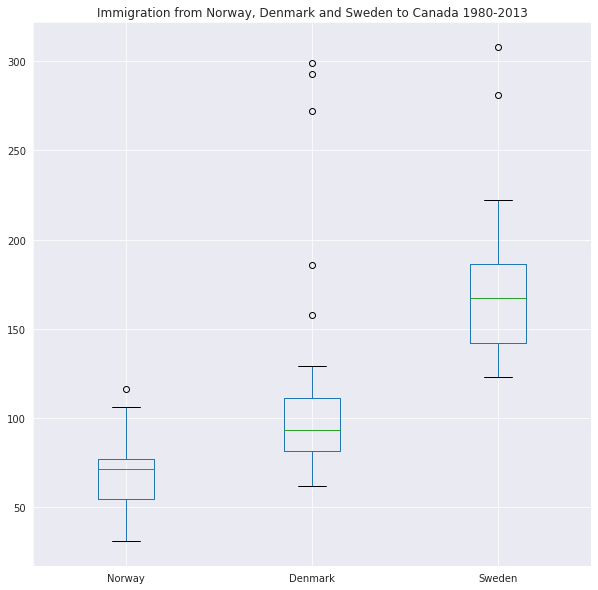

In [ ]:
df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],years].transpose()
df_nds.head()

df_nds.plot(
    kind="box",
    figsize=(10,10)
)
plt.title("Immigration from Norway, Denmark and Sweden to Canada 1980-2013")
plt.show()

**Q4. Waffle Chart for Norway, denmark and sweden**

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_nds.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
df_nds = df_can.loc[['Norway','Denmark', 'Sweden'],:]
df_nds.head()
categories = df_nds.index.values

value = df_nds['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

Total number of tiles is 400
Norway: 77
Denmark: 129
Sweden: 194


<Figure size 432x288 with 0 Axes>

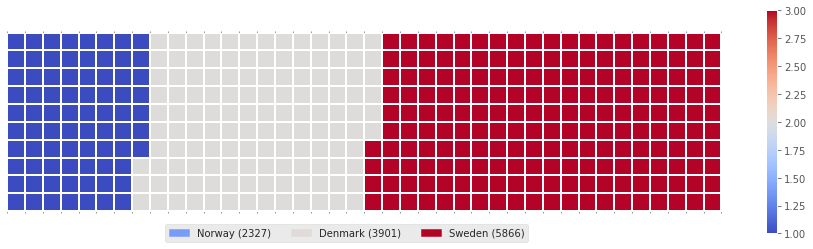

In [ ]:
create_waffle_chart(categories, value, height, width, colormap)

**Q5. Check for outliers in years 2013**

In [ ]:
for country in df_can.index:
  print(country)
  df = df_can.loc[[country], years].transpose()
  df = df.loc[2013].describe()
  Q1 = df.loc['25%']
  Q3 = df.loc['75%']
  IQR=Q3-Q1
  Outlier1 = Q3+1.5*IQR
  Outlier2 = Q1 - 1.5*IQR
  print(Outlier1)
  print(Outlier2)
  print('\n')

India
33087.0
33087.0


China
34129.0
34129.0


United Kingdom of Great Britain and Northern Ireland
5827.0
5827.0


Philippines
29544.0
29544.0


Pakistan
12603.0
12603.0


United States of America
8501.0
8501.0


Iran (Islamic Republic of)
11291.0
11291.0


Sri Lanka
2394.0
2394.0


Republic of Korea
4509.0
4509.0


Poland
852.0
852.0


Lebanon
2172.0
2172.0


France
5623.0
5623.0


Jamaica
2479.0
2479.0


Viet Nam
2112.0
2112.0


Romania
1512.0
1512.0


Haiti
4152.0
4152.0


Guyana
656.0
656.0


Portugal
630.0
630.0


Egypt
4165.0
4165.0


Morocco
3261.0
3261.0


Colombia
3631.0
3631.0


Iraq
4918.0
4918.0


Algeria
4331.0
4331.0


Israel
1945.0
1945.0


Bangladesh
3789.0
3789.0


Germany
1217.0
1217.0


Russian Federation
2466.0
2466.0


Mexico
3996.0
3996.0


Afghanistan
2004.0
2004.0


El Salvador
639.0
639.0


Ukraine
2487.0
2487.0


Trinidad and Tobago
427.0
427.0


Somalia
2028.0
2028.0


South Africa
1240.0
1240.0


Nigeria
4172.0
4172.0


Jordan
1255.0
1255.0


Ethiopia
1606

**Q6. Plot for mumbai city crimes (markers to map)**

In [ ]:

import numpy as np
import pandas as pd
import folium

In [ ]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.head()

df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [ ]:
df1 = df_incidents.iloc[0:100,:]

lat = 37.77
long = -122.42


map2 = folium.Map(location=[lat, long], zoom_start=12)

map2

In [ ]:
#get dataset
df1 = df_incidents.iloc[0:100,:]

#created a map
lat = 19.0760
long = 72.8777
map2 = folium.Map(location=[lat, long], zoom_start=12)


#Step 2: type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(map2)
#Step 3: show map
map2

In [ ]:
#get dataset
df1 = df_incidents.iloc[0:100,:]

#created a map
lat = 19.0760
long = 72.8777
map2 = folium.Map(location=[lat, long], zoom_start=12)


#Step 1: records have to be stores in  a datastricture
incidents = folium.map.FeatureGroup()



#Step 2: type of markers to use
for lat, long, labs in zip(df1.Y, df1.X, df1.Category):
   incidents.add_child(
       folium.CircleMarker(
           [lat, long],
           radius=5,
           color='yellow',
           fill=True,  
           popup=labs        
       ).add_to(incidents)


   )


#Step 3: add map
map2.add_child(incidents)

**Chloropleth maps**

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

df_can.drop(['AREA','Type','Coverage','DEV','REG'], inplace=True, axis='columns')

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-Region','DevName':'Development-status'}, inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()

Data downloaded and read into a dataframe!


,Country,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

world_map

In [ ]:
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country', 'Total'],
    legend_name = 'Immigration to Canada',
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2
)

world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:

scale = np.linspace(df_can['Total'].min(), df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

world_map = folium.Map(location=[0,0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data = world_geo,
    data = df_can,
    columns = ['Country', 'Total'],
    legend_name = 'Immigration to Canada',
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    threshold_scale= scale,
    reset=True
)

world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
